# Multiple files with `pandas`

In [1]:
import numpy as np
import pandas as pd
import matplotlib

## Merge Practice

In [2]:
a_df = pd.DataFrame({
    'Country': ['Germany', 'France', 'Belgium', 'Finland'],
    'Population (M)': [82.8, 67.2, 11.4, 5.5],
    'Capital': ['Berlin', 'Paris', 'Brussels', 'Helsinki']
})
a_df

,Country,Population (M),Capital
0,Germany,82.8,Berlin
1,France,67.2,Paris
2,Belgium,11.4,Brussels
3,Finland,5.5,Helsinki


In [3]:
b_df = pd.DataFrame({
    'Country': ['Germany', 'France', 'Belgium', 'Canada'],
    'HDI': [0.936, 0.901, 0.916, 0.926]
})
b_df

,Country,HDI
0,Germany,0.936
1,France,0.901
2,Belgium,0.916
3,Canada,0.926


In [4]:
inner_merged_df = a_df.merge(b_df, left_on=[('Country')], right_on=[('Country')])
inner_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916


### Inner Merge Practice


In [5]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df1

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5


In [6]:
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})
df2

,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


In [7]:
df1.merge(df2, on=None)

,lkey,value,rkey
0,foo,5,foo


In [8]:
df1.merge(df2, left_on='lkey', right_on='rkey')

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


#### Check your code

In [9]:
from nbresult import ChallengeResult

result = ChallengeResult('inner_merge',
    inner_merged_shape=inner_merged_df.shape,
    inner_merged_nulls=sum(inner_merged_df.isnull().sum())
)
result.write()

print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/tanushrinayak/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tanushrinayak/code/tanushrin/02-Data-Toolkit/01-Data-Analysis/data-multiple-files-with-pandas/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_inner_merge.py::TestInnerMerge::test_inner_merged_nulls PASSED      [ 50%]
test_inner_merge.py::TestInnerMerge::test_inner_merged_shape PASSED      [100%]

============================== 2 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/inner_merge.pickle

git commit -m 'Completed inner_merge step'

git push origin master



### Left Merge Practice

In [10]:
left_merged_df = a_df.merge(b_df, how='left', on='Country')
left_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Finland,5.5,Helsinki,NaN


#### Check your code

In [11]:
from nbresult import ChallengeResult

result = ChallengeResult('left_merge',
    left_merged_shape=left_merged_df.shape,
    left_merged_nulls=sum(left_merged_df.isnull().sum())
)
result.write()

print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/tanushrinayak/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tanushrinayak/code/tanushrin/02-Data-Toolkit/01-Data-Analysis/data-multiple-files-with-pandas/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_left_merge.py::TestLeftMerge::test_left_merged_df_shape PASSED      [ 50%]
test_left_merge.py::TestLeftMerge::test_left_merged_nulls PASSED         [100%]

============================== 2 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/left_merge.pickle

git commit -m 'Completed left_merge step'

git push origin master



### Right Merge Practice

In [12]:
right_merged_df = a_df.merge(b_df, how='right', on='Country')
right_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Canada,NaN,NaN,0.926


#### Check your code

In [13]:
from nbresult import ChallengeResult

result = ChallengeResult('right_merge',
    right_merged_shape=right_merged_df.shape,
    right_merged_nulls=sum(right_merged_df.isnull().sum())
)
result.write()

print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/tanushrinayak/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tanushrinayak/code/tanushrin/02-Data-Toolkit/01-Data-Analysis/data-multiple-files-with-pandas/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_right_merge.py::TestRightMerge::test_right_merged_df_shape PASSED   [ 50%]
test_right_merge.py::TestRightMerge::test_right_merged_nulls PASSED      [100%]

============================== 2 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/right_merge.pickle

git commit -m 'Completed right_merge step'

git push origin master



### Outer Merge Practice

In [14]:
outer_merged_df = a_df.merge(b_df, how = "outer", on = "Country")
outer_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Finland,5.5,Helsinki,NaN
4,Canada,NaN,NaN,0.926


#### Check your code

In [15]:
from nbresult import ChallengeResult

result = ChallengeResult('outer_merge',
    outer_merged_shape=outer_merged_df.shape,
    outer_merged_nulls=sum(outer_merged_df.isnull().sum())
)
result.write()

print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/tanushrinayak/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tanushrinayak/code/tanushrin/02-Data-Toolkit/01-Data-Analysis/data-multiple-files-with-pandas/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_outer_merge.py::TestOuterMerge::test_outer_merged_df_shape PASSED   [ 50%]
test_outer_merge.py::TestOuterMerge::test_outer_merged_nulls PASSED      [100%]

============================== 2 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/outer_merge.pickle

git commit -m 'Completed outer_merge step'

git push origin master



## Join Practice

In [16]:
aa_df = a_df.set_index("Country")
aa_df

,Population (M),Capital
Country,,
Germany,82.8,Berlin
France,67.2,Paris
Belgium,11.4,Brussels
Finland,5.5,Helsinki


In [17]:
bb_df = b_df.set_index("Country")
bb_df

,HDI
Country,
Germany,0.936
France,0.901
Belgium,0.916
Canada,0.926


In [18]:
aa_df.join(bb_df)

,Population (M),Capital,HDI
Country,,,
Germany,82.8,Berlin,0.936
France,67.2,Paris,0.901
Belgium,11.4,Brussels,0.916
Finland,5.5,Helsinki,NaN


By default, .join() does a left join.

In [19]:
a_inner = aa_df.join(bb_df, how='inner')
a_right = aa_df.join(bb_df, how='right')
a_outer = aa_df.join(bb_df, how='outer')

In [20]:
a_inner

,Population (M),Capital,HDI
Country,,,
Germany,82.8,Berlin,0.936
France,67.2,Paris,0.901
Belgium,11.4,Brussels,0.916


In [21]:
a_right

,Population (M),Capital,HDI
Country,,,
Germany,82.8,Berlin,0.936
France,67.2,Paris,0.901
Belgium,11.4,Brussels,0.916
Canada,NaN,NaN,0.926


In [22]:
a_outer

,Population (M),Capital,HDI
Country,,,
Belgium,11.4,Brussels,0.916
Canada,NaN,NaN,0.926
Finland,5.5,Helsinki,NaN
France,67.2,Paris,0.901
Germany,82.8,Berlin,0.936


.merge() and .join() give same outcomes in the end.
We can use .merge() when you want to merge based on a given column and .join() when you want to join on the index.

## Concat Practice

In [23]:
concat_df = pd.concat([a_df, b_df], axis="index", sort=False)
concat_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,NaN
1,France,67.2,Paris,NaN
2,Belgium,11.4,Brussels,NaN
3,Finland,5.5,Helsinki,NaN
0,Germany,NaN,NaN,0.936
1,France,NaN,NaN,0.901
2,Belgium,NaN,NaN,0.916
3,Canada,NaN,NaN,0.926


## Olympic Sports and Medals, 1896-2014

In [24]:
countries_df = pd.read_csv("dictionary.csv", decimal=",")
countries_df.head(5)

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081219966
1,Albania,ALB,2889167.0,3945.21758150914
2,Algeria,ALG,39666519.0,4206.03123244958
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [25]:
summer_df = pd.read_csv("summer.csv", decimal=",")
summer_df.head(5)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [26]:
winter_df = pd.read_csv("winter.csv", decimal=",")
winter_df.head(5)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


<p> We can merge the 3 dataframes countries_df, summer_df, and winter_df by using pandas.DataFrame.rename() function on your winter and summer dataframes.

In [27]:
winter_df.rename(columns={'Country': 'Code'}, inplace=True)
summer_df.rename(columns={'Country': 'Code'}, inplace=True)

In [28]:
winter_df.head(2)

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze


In [29]:
summer_df.head(2)

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver


### Combining The Data

In [30]:
summer_countries_df = countries_df.merge(summer_df, left_on=[('Code')], right_on=[('Code')])
summer_countries_df['Season'] = 'Summer'
summer_countries_df

,Country,Code,Population,GDP per Capita,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Season
0,Afghanistan,AFG,32526562.0,594.323081219966,2008,Beijing,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,- 58 KG,Bronze,Summer
1,Afghanistan,AFG,32526562.0,594.323081219966,2012,London,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,58 - 68 KG,Bronze,Summer
2,Algeria,ALG,39666519.0,4206.03123244958,1984,Los Angeles,Boxing,Boxing,"ZAOUI, Mohamed",Men,71-75KG,Bronze,Summer
3,Algeria,ALG,39666519.0,4206.03123244958,1984,Los Angeles,Boxing,Boxing,"MOUSSA, Mustapha",Men,75 - 81KG (Light-Heavyweight),Bronze,Summer
4,Algeria,ALG,39666519.0,4206.03123244958,1992,Barcelona,Athletics,Athletics,"BOULMERKA, Hassiba",Women,1500M,Gold,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25737,Zimbabwe,ZIM,15602751.0,924.143819253412,2004,Athens,Aquatics,Swimming,"COVENTRY, Kirsty",Women,200M Individual Medley,Bronze,Summer
25738,Zimbabwe,ZIM,15602751.0,924.143819253412,2008,Beijing,Aquatics,Swimming,"COVENTRY, Kirsty",Women,100M Backstroke,Silver,Summer
25739,Zimbabwe,ZIM,15602751.0,924.143819253412,2008,Beijing,Aquatics,Swimming,"COVENTRY, Kirsty",Women,200M Backstroke,Gold,Summer
25740,Zimbabwe,ZIM,15602751.0,924.143819253412,2008,Beijing,Aquatics,Swimming,"COVENTRY, Kirsty",Women,200M Individual Medley,Silver,Summer


In [31]:
winter_countries_df = countries_df.merge(winter_df, left_on=[('Code')], right_on=[('Code')])
winter_countries_df['Season'] = 'Winter'
winter_countries_df

,Country,Code,Population,GDP per Capita,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Season
0,Australia,AUS,23781169.0,56310.9629933721,1994,Lillehammer,Skating,Short Track Speed Skating,"BRADBURY, Steven",Men,5000M Relay,Bronze,Winter
1,Australia,AUS,23781169.0,56310.9629933721,1994,Lillehammer,Skating,Short Track Speed Skating,"HANSEN, Kieran",Men,5000M Relay,Bronze,Winter
2,Australia,AUS,23781169.0,56310.9629933721,1994,Lillehammer,Skating,Short Track Speed Skating,"MURTHA, Andrew",Men,5000M Relay,Bronze,Winter
3,Australia,AUS,23781169.0,56310.9629933721,1994,Lillehammer,Skating,Short Track Speed Skating,"NIZIELSKI, Richard",Men,5000M Relay,Bronze,Winter
4,Australia,AUS,23781169.0,56310.9629933721,1998,Nagano,Skiing,Alpine Skiing,"STEGGALL, Zali",Women,Slalom,Bronze,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4821,United States,USA,321418820.0,56115.7184261955,2014,Sochi,Skiing,Snowboard,"DEIBOLD, Alex",Men,Snowboard Cross,Bronze,Winter
4822,United States,USA,321418820.0,56115.7184261955,2014,Sochi,Skiing,Snowboard,"CLARK, Kelly",Women,Half-Pipe,Bronze,Winter
4823,United States,USA,321418820.0,56115.7184261955,2014,Sochi,Skiing,Snowboard,"FARRINGTON, Kaitlyn",Women,Half-Pipe,Gold,Winter
4824,United States,USA,321418820.0,56115.7184261955,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",Women,Slopestyle,Gold,Winter


In [32]:
all_df = pd.concat([summer_countries_df, winter_countries_df])
all_df = all_df.sort_index(axis=1)
all_df

,Athlete,City,Code,Country,Discipline,Event,GDP per Capita,Gender,Medal,Population,Season,Sport,Year
0,"NIKPAI, Rohullah",Beijing,AFG,Afghanistan,Taekwondo,- 58 KG,594.323081219966,Men,Bronze,32526562.0,Summer,Taekwondo,2008
1,"NIKPAI, Rohullah",London,AFG,Afghanistan,Taekwondo,58 - 68 KG,594.323081219966,Men,Bronze,32526562.0,Summer,Taekwondo,2012
2,"ZAOUI, Mohamed",Los Angeles,ALG,Algeria,Boxing,71-75KG,4206.03123244958,Men,Bronze,39666519.0,Summer,Boxing,1984
3,"MOUSSA, Mustapha",Los Angeles,ALG,Algeria,Boxing,75 - 81KG (Light-Heavyweight),4206.03123244958,Men,Bronze,39666519.0,Summer,Boxing,1984
4,"BOULMERKA, Hassiba",Barcelona,ALG,Algeria,Athletics,1500M,4206.03123244958,Women,Gold,39666519.0,Summer,Athletics,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4821,"DEIBOLD, Alex",Sochi,USA,United States,Snowboard,Snowboard Cross,56115.7184261955,Men,Bronze,321418820.0,Winter,Skiing,2014
4822,"CLARK, Kelly",Sochi,USA,United States,Snowboard,Half-Pipe,56115.7184261955,Women,Bronze,321418820.0,Winter,Skiing,2014
4823,"FARRINGTON, Kaitlyn",Sochi,USA,United States,Snowboard,Half-Pipe,56115.7184261955,Women,Gold,321418820.0,Winter,Skiing,2014
4824,"ANDERSON, Jamie",Sochi,USA,United States,Snowboard,Slopestyle,56115.7184261955,Women,Gold,321418820.0,Winter,Skiing,2014


#### Check your code

In [33]:
from nbresult import ChallengeResult

result = ChallengeResult('all_df',
    all_df_shape=all_df.shape,
    all_df_columns=set(all_df.columns)
)
result.write()

print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/tanushrinayak/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tanushrinayak/code/tanushrin/02-Data-Toolkit/01-Data-Analysis/data-multiple-files-with-pandas/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_all_df.py::TestAllDf::test_all_df_columns PASSED                    [ 50%]
test_all_df.py::TestAllDf::test_all_df_shape PASSED                      [100%]

============================== 2 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/all_df.pickle

git commit -m 'Completed all_df step'

git push origin master



### Top Countries Analysis

In [79]:
countries_df = all_df[all_df["Year"]>=1984].groupby('Country').count()[['Medal']].sort_values(by="Medal",ascending=False)
top_10_df = countries_df.head(10).rename(columns={'Medal':'Medal Count'})
top_10_df


,Medal Count
Country,
United States,2472
Germany,1112
Russia,1031
Australia,891
China,889
Canada,801
Italy,632
"Korea, South",587
France,587


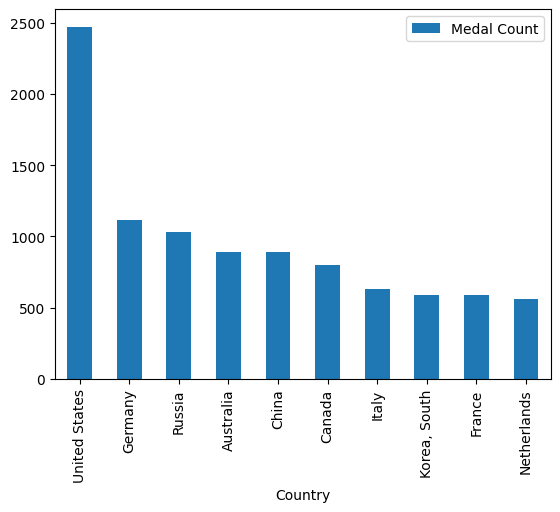

In [80]:
top_10_df.plot(kind="bar");

#### Check your code

In [81]:
from nbresult import ChallengeResult

result = ChallengeResult('olympic_games',
    top_country_1=top_10_df.iloc[0]['Medal Count'],
    top_country_10=top_10_df.iloc[9]['Medal Count']
)
result.write()

print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/tanushrinayak/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tanushrinayak/code/tanushrin/02-Data-Toolkit/01-Data-Analysis/data-multiple-files-with-pandas/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_olympic_games.py::TestOlympicGames::test_top_10_countries_medals PASSED [100%]

============================== 1 passed in 0.18s ===============================


💯 You can commit your code:

git add tests/olympic_games.pickle

git commit -m 'Completed olympic_games step'

git push origin master

